In [14]:
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np
import mpl_axes_aligner

In [10]:
def align_yaxis(ax1, v1, ax2, v2):
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

In [2]:
provinces=['Eastern Cape','Free State','Gauteng','KwaZulu-Natal','Limpopo','Mpumalanga','North West','Northern Cape','Western Cape']
headings=['Facilities Reporting','Admissions to Date','Died to Date','Discharged to Date','Currently Admitted','Currently in ICU','Currently Ventilated','Currently Oxygenated','Admissions in Previous Day']

<Figure size 432x288 with 0 Axes>

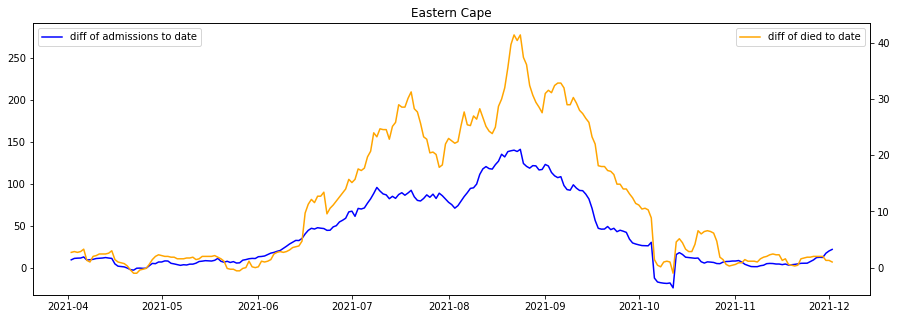

<Figure size 432x288 with 0 Axes>

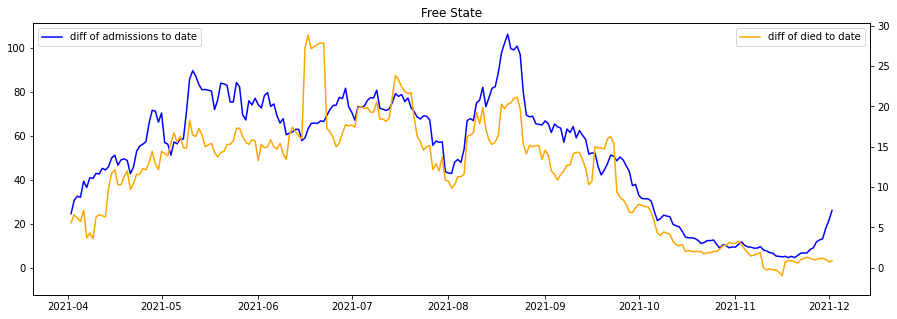

<Figure size 432x288 with 0 Axes>

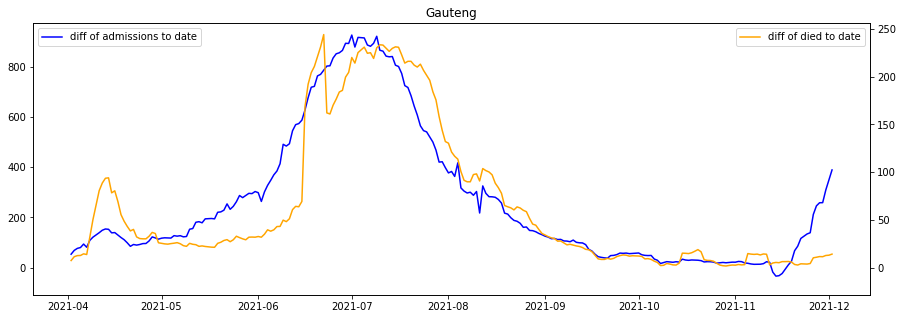

<Figure size 432x288 with 0 Axes>

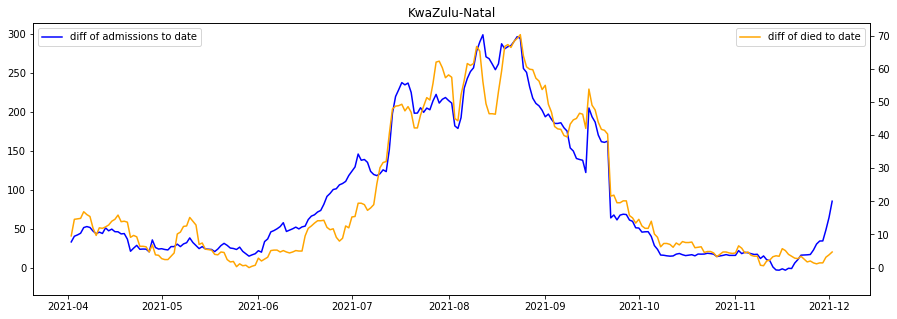

<Figure size 432x288 with 0 Axes>

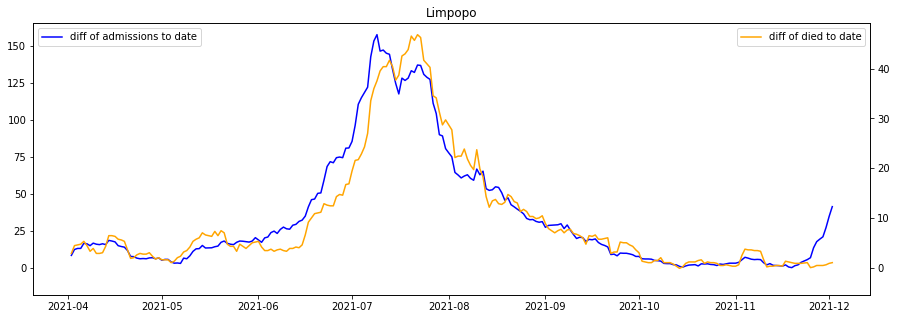

<Figure size 432x288 with 0 Axes>

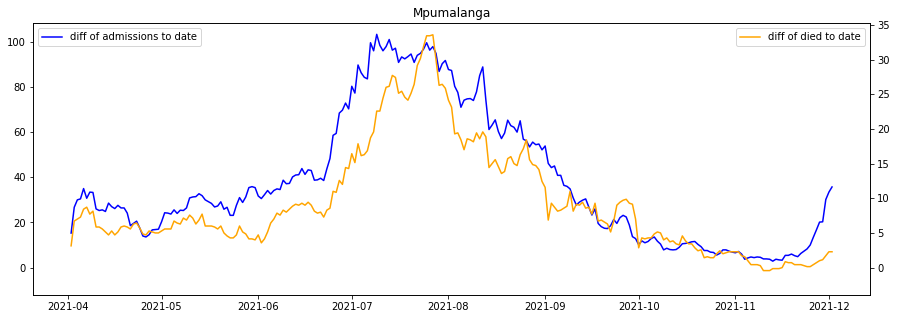

<Figure size 432x288 with 0 Axes>

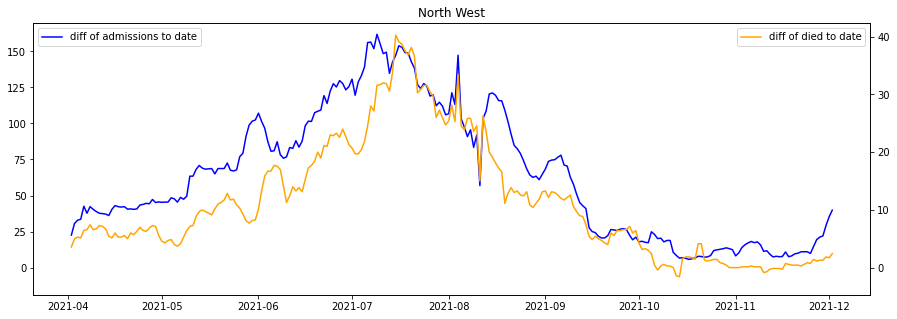

<Figure size 432x288 with 0 Axes>

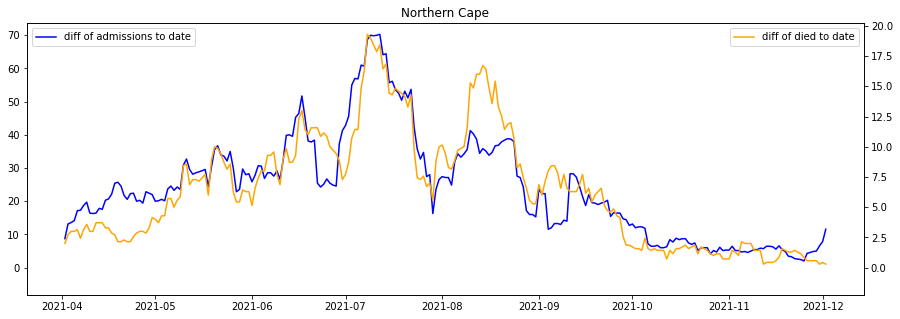

<Figure size 432x288 with 0 Axes>

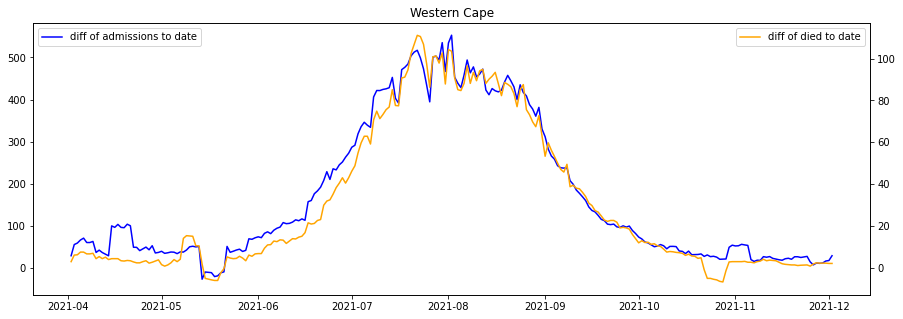

In [18]:
with open("SouthAfricaHospData.json", "r") as f:
    data = json.load(f)
    
startDate = datetime.datetime(2021, 4, 1)
endDate = datetime.datetime.now()

def N_avg(a, N=7):
    # hard edged convolution into past, preserve len(a) by nan-ing
    b = np.zeros(len(a))
    for i in range(N-1):
        b[i] = np.nan
    for i in range(N-1,len(a),1):
        b[i] = np.mean(a[i-N+1:i+1])
    return b    
    
for province in provinces:
    x = []
    y_admiss_cum = []
    y_admiss_ = []
    y_died_cum = []
    for date, _d in data.items():
        if date=="2020-05-25" or date=="2020-05-24" or date=="2021-11-23":
            continue
        d = data[date][province]
        x_date = datetime.datetime.strptime(date, '%Y-%m-%d')
        if x_date > endDate or x_date < startDate:
            continue
        if not "Admissions in Previous Day" in d.keys():
            continue
        y_admiss_cum.append(d["Admissions to Date"])
        y_admiss_.append(d["Admissions in Previous Day"])
        y_died_cum.append(d["Died to Date"])
        x.append(x_date)
    
    y_admiss = np.flip(np.diff(np.flip(y_admiss_cum)))
    y_admiss = np.append(y_admiss, np.nan)
    y_died = np.flip(np.diff(np.flip(y_died_cum)))
    y_died = np.append(y_died, np.nan)
    #x = x[:-1]
    
    plt.clf()
    fig, ax1 = plt.subplots(1,1, figsize=(15,5))
    ax2 = ax1.twinx()    
    #plt.plot(x,N_avg(y_admiss_), label="admissions on previous day")
    ax1.plot(x,N_avg(y_admiss), label="diff of admissions to date", color="blue")
    ax2.plot(x,N_avg(y_died), label="diff of died to date", color="orange")
    plt.title(province)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    mpl_axes_aligner.align.yaxes(ax1, 0, ax2, 0, 0.1)
    plt.savefig(province+".png", bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()
